In [1]:
import xlwings as xw 
from sklearn import datasets
import pandas as pd
import numpy as np
import utils as ut
import matplotlib.pyplot as plt 

% matplotlib inline

## Visualise univariate data

### Extract Data 
Copy the data from excel and check for the first 5 rows

In [6]:
input_data = xw.sheets('univariate_data').range('b6:c107').options(pd.DataFrame,index = False).value
input_data.head()

,X,y
0,0.433377,2.041898
1,0.378328,1.408507
2,0.179826,0.555435
3,0.433074,2.002243
4,0.043973,0.961575


## Visualisation

Visualise how different choices of slopes and intercepts will affect the prediction errors

In [7]:
import imp 
imp.reload(ut)
ut.get_linreg_interactive(input_data)

## Find slope m and intercept c


There is a functionality in Python which allows us to find $m$ and $c$ which minimize the error

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(input_data['X'].values.reshape(-1,1),input_data['y'])

print('m : {} and c : {}'.format(lr.coef_,lr.intercept_))


m : [2.52597752] and c : 0.5501250398842417


# Gradient Descent with one variable

Suppose that we want to find the minimizer of a quadratic function $f(x) = x^2 - 6x + 5 $ using gradient descent algorithm. We know that the first derivative of this function is $Df(x) = 2x-6$. Using this information, we can write a little script.

In [14]:
import numpy as np 

f = lambda x: x**2 - 6*x + 5
Df = lambda x: 2*x - 6

x0 = -5 # initial value of the algorithm 
nu = 0.1 # learning rate

while True:     
    x1 = x0 - nu * Df(x0)
    
    if np.abs(x1-x0) < 0.001:
        break
    else:
        x0 = x1

print(x0)

2.9959435180792697


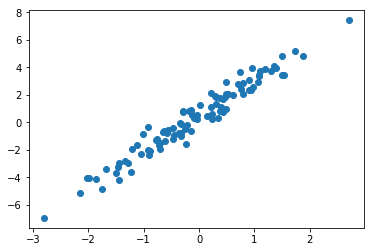

In [47]:
import numpy as np

nobs = 100 
x = np.random.randn(100) 

a = 2.5 
b = 0.5 
sig = 0.5 
y = a*x + b + sig*np.random.randn(100)

plt.plot(x,y,'o')


In [43]:
y = input_data['y']
x = input_data['X']


J = lambda a,b : 0.5 * np.sum( (y-(a*x+b))**2 )

Ja = lambda a,b : np.sum( (y-(a*x+b))*(-x) )
Jb = lambda a,b : np.sum( (y-(a*x+b))*(-1) )


a0 = -2 
b0 = -2

nu = 0.01

while True: 
    a = a0 - nu * Ja(a0,b0)
    b = b0 - nu * Jb(a0,b0)
    
    if np.sqrt( (a-a0)**2 + (b-b0)**2 ) < 0.001: 
        break
    else: 
        a0 = a
        b0 = b 

print('a : {} and b : {}'.format(a0,b0))


a : 2.513206051039314 and b : 0.5565081444364157


# Gradient descent with two variables (original problem)

## Can we check the numerical results analytically?

In [34]:
v1 = input_data['X'].values.reshape(-1,1)
v2 = np.ones(len(v1))

X = np.matrix(np.c_[v1,v2])
y = np.matrix(input_data['y']).T

params = np.linalg.inv(X.T*X)*X.T*y
params


matrix([[2.52597752],
        [0.55012504]])

## Exercises

## Estimating regression coefficients from real dataset

Can you calculate the regression coefficients from a real dataset manually without using any standard library? 

In [49]:
raw_data = ut.get_boston_data()


In [54]:
X = raw_data.drop(['target'],axis =1 ).values 
y = raw_data['target'].values

from sklearn import linear_model

lr = linear_model.
